# Week_1-Probability

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Function to plot the binomial distribution for a sequence of n values
def plot_binomial_distributions(nlist, p):
    for n in nlist:
        k = np.arange(0, n+1)
        f = binom.pmf(k, n, p)
        plt.bar(k, f)
        plt.xlabel('Number of Successes')
        plt.ylabel('Probability')
        plt.title(f'Binomial Distribution, p={p} n={n}')
        plt.show()

# Function to plot the rescaled binomial distributions
def plot_rescaled_binomial_distributions(nlist, p, zmax):
    for n in nlist:
        k = np.arange(0, n+1)
        z = (k - n*p) / np.sqrt(n*p*(1-p))
        zi = np.abs(z) <= zmax
        f = binom.pmf(k, n, p)
        plt.bar(z[zi], f[zi])
        plt.xlabel('Scaling Variable z')
        plt.ylabel('Probability')
        plt.title(f'Binomial Distribution, p={p} n={n}')
        plt.show()

# Parameters
nlist = [1, 2, 5, 10, 20, 50, 100, 1000]
p = 0.1
zmax = 5

# Plot the binomial distributions
plot_binomial_distributions(nlist, p)

# Plot the rescaled binomial distributions
plot_rescaled_binomial_distributions(nlist, p, zmax)


# Week_2-Introduction_to_Discrete-Time_Stochastic_Processes

## AR(1) Process Simulation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
phi = 0.8
mu = 0
sigma = 1
n = 100

# Generate white noise
epsilon = np.random.normal(0, sigma, n)

# Initialize the series
X = np.zeros(n)

# Simulate the AR(1) process
for t in range(1, n):
    X[t] = mu + phi * X[t-1] + epsilon[t]

# Plot the series
plt.plot(X)
plt.title('AR(1) Process Simulation')
plt.xlabel('Time')
plt.ylabel('X_t')
plt.show()


```yaml
title: "Testing the Random Walk"
author: "Paul F. Mende"
date: "Summer 2021"
output: 
  html_notebook:
  df_print: paged
  toc: yes
```

Before we get started, let's install a few **packages**.
- The `pip install` command is run **once** to download the software to your computer.
- The `import` command is run **one time per session** in order to load a package's functions and make them available.

In [ ]:
# If you have never installed them, uncomment the lines below and run it one time.

# !pip install yfinance pandas numpy matplotlib


In [ ]:
# Now we'll load packages.

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Tootsie Roll

Let's load some data and look at default summary stats for data from Tootsie Roll (TR).

**Technical note:** Data is often exchanged using "flat files," which are plain text files that can be read using a simple text editor.

In [ ]:
# Fetch some test data from Yahoo! Finance

# Define query parameters
ticker = "TR"
date_first = "1987-12-31"
date_last = "2017-12-31"

# Get the data
TR = yf.download(ticker, start=date_first, end=date_last)


In [ ]:
# Here is what the price looks like over time

plt.plot(TR.index, TR['Adj Close'], label='Adjusted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('TR Adjusted Price 1988-2017')
plt.grid(True)
plt.show()


In [ ]:
# Compute the returns
P = TR['Adj Close']
r = np.diff(np.log(P))
N = len(r)

# The returns can also be stored as a new column in TR.
TR['r'] = np.append([np.nan], r)

# Trim off the first row, which has return NA
TR = TR.dropna()

plt.plot(TR.index, TR['r'], label='Daily Returns')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('TR Daily Returns 1988-2017')
plt.grid(True)
plt.show()


In [ ]:
# The daily return series is noisy, and the mean value is barely visible.
# Compare the graph above with the simulation below, in which simulated returns have the same average volatility and zero mean.

plt.plot(TR.index, np.random.normal(scale=np.std(TR['r']), size=len(TR)), label='White Noise')
plt.ylim(-0.18, 0.18)
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('White Noise Process with TR Volatility')
plt.grid(True)
plt.show()

# ## Summary statistics and return distribution


In [ ]:
# These are high-level summary stats that pandas provides for any data frame.
TR.describe()


In [ ]:
# Annualization conventions
# Annualized return = 252 * (Daily return)
# Annualized std. dev. = sqrt(252) * (Daily std. dev)

mean_return_annualized = np.mean(r) * 252
volatility_annualized = np.std(r) * np.sqrt(252)

mean_return_annualized, volatility_annualized


In [ ]:
# The histogram of returns has fat tails (and therefore a thin middle).

plt.hist(r, bins=50)
plt.title('Histogram of TR Daily Returns')
plt.show()

# ## Lo & MacKinlay


Following Lo & MacKinlay, we ask whether the measured sample variance of returns grows linearly as a function of the observation interval.

In [ ]:
Variance = [np.var(np.diff(np.log(P)))]

for n in range(2, 101):
    Variance.append(np.var(np.diff(np.log(P[::n]))))

plt.plot(Variance)
plt.xlabel('n')
plt.title('Variance of Returns From n-day Observations')
plt.grid(True)
plt.show()

# ## Variance and Ratios


Define functions for $\widehat \sigma^2_c$

In [ ]:
def variance_c(X, q):
    T = len(X) - 1
    mu = (X[-1] - X[0]) / T
    m = (T - q) * (T - q + 1) * q / T
    sumsq = sum((X[t + 1] - X[t - q + 1] - q * mu) ** 2 for t in range(q, T))
    return sumsq / m

def z_stat(X, q):
    T = len(X) - 1
    c = np.sqrt(T * (3 * q) / (2 * (2 * q - 1) * (q - 1)))
    M = variance_c(X, q) / variance_c(X, 1) - 1
    return c * M

Vc = [variance_c(np.log(P), q) for q in range(1, 101)]
zstats = [z_stat(np.log(P), q) for q in range(2, 101)]
pValues = [2 * (1 - np.abs(np.random.normal(0, 1))) for z in zstats]

plt.bar(range(2, 101), zstats)
plt.xlabel('q')
plt.ylabel('z')
plt.title('z Statistics of Variance Ratio Test')
plt.show()

# ## Interpreting the test statistics


The test statistic $z(q)$ was constructed to be normally distributed as ${\cal N}(0,1)$ if the data followed a random walk and scaled accordingly.

In [ ]:
sigma = [np.sqrt(252) * np.std(np.diff(np.log(P)))]
for n in range(2, 101):
    sigma.append(np.sqrt(252 / n) * np.std(np.diff(np.log(P[::n]))))

plt.bar(range(1, 101), sigma)
plt.xlabel('n')
plt.ylabel('Standard Deviation (annualized) / sqrt(n)')
plt.title('Volatility Scaling of Returns From n-day Observations (TR)')
plt.grid(True)
plt.show()


In [ ]:
# Simulation of returns with similar volatility

P_MC = np.exp(np.cumsum(np.random.normal(scale=0.02, size=N)))
sigma_MC = [np.sqrt(252) * np.std(np.diff(np.log(P_MC)))]

for n in range(2, 101):
    sigma_MC.append(np.sqrt(252 / n) * np.std(np.diff(np.log(P_MC[::n]))))

plt.bar(range(1, 101), sigma_MC)
plt.xlabel('n')
plt.ylabel('Standard Deviation (annualized) / sqrt(n)')
plt.title('Volatility Scaling of Returns From n-day Observations (Sim)')
plt.grid(True)
plt.show()



## Simple 20-step random walk

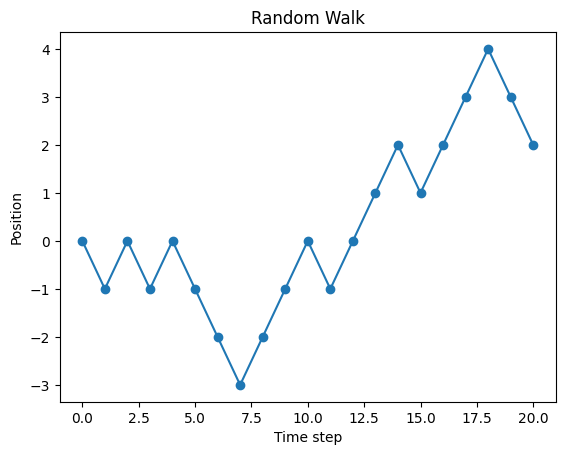

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set probability of "success" and "failure"
p = 0.5
q = 1 - p

# Number of time steps
Nt = 20

# Number of sample paths
Np = 1

# Generate a set of uniform random draws
z = np.random.rand(Nt, Np)

# Transform to binomial random variable +/- 1
x = np.sign(p - z)

# Initial value for random walk
s = np.zeros((Nt + 1, Np))

# Perform the random walk
for t in range(Nt):
    s[t + 1, :] = s[t, :] + x[t, :]

# Plot the resulting path
plt.plot(s, marker='o')
plt.xlabel('Time step')
plt.ylabel('Position')
plt.title('Random Walk')
plt.show()

## Many simulations of a one-year daily walk

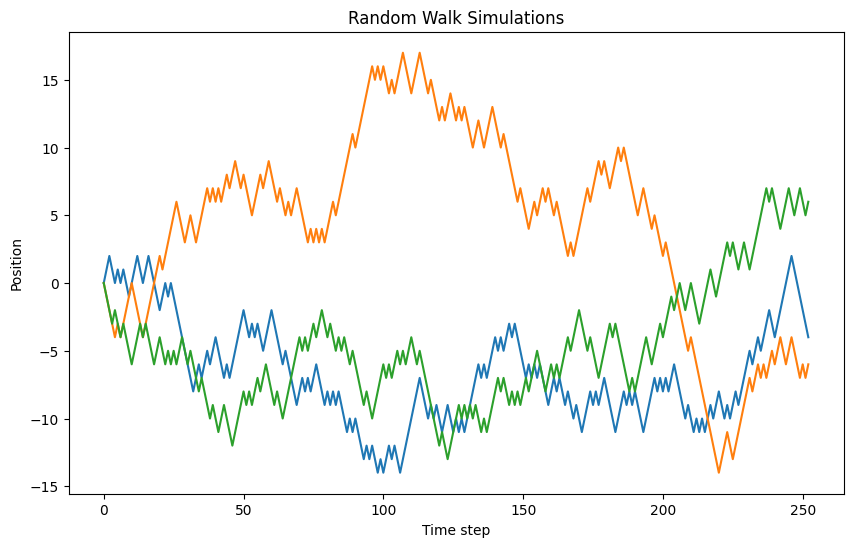

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set probability of "success" and "failure"
p = 0.5
q = 1 - p

# Number of trading days in a year
Nt = 252

# Number of simulations
Np = int(1e4)

# Generate a set of uniform random draws
z = np.random.rand(Nt, Np)

# Transform to binomial random variable +/- 1
x = np.sign(p - z)

# Initialize and reserve space for random paths
s = np.zeros((Nt + 1, Np))

# Perform the random walk
for t in range(Nt):
    s[t + 1, :] = s[t, :] + x[t, :]

# Plot the first three paths
plt.figure(figsize=(10, 6))
plt.plot(s[:, :3])
plt.xlabel('Time step')
plt.ylabel('Position')
plt.title('Random Walk Simulations')
plt.show()


## Simulating a lognormal price process

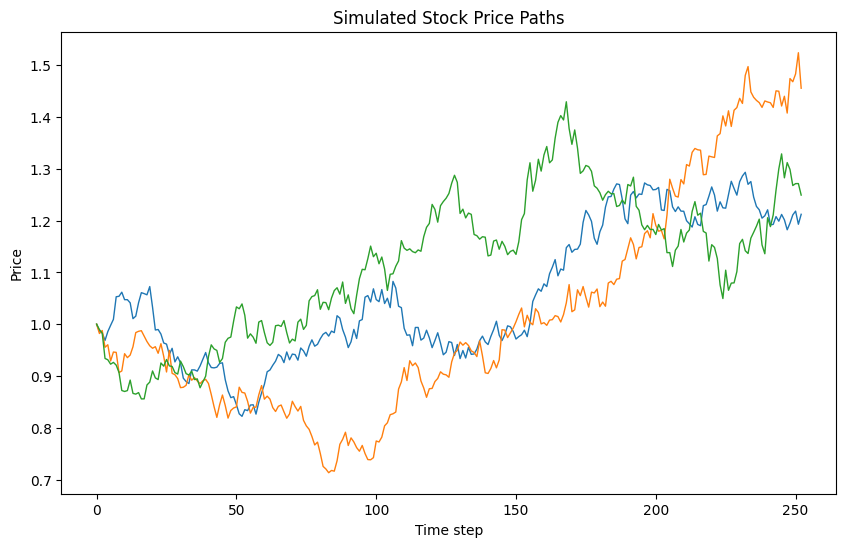

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
sigma = 0.3  # Annualized volatility (30%)
mu = 0.1     # Annualized drift/return (10%)
dt = 1 / 252 # Time step scale factor (daily)

# Number of trading days in a year
Nt = 252

# Number of simulations
Np = int(1e4)

# Generate a set of standard normal random draws
z = np.random.randn(Nt, Np)

# Draw daily returns from scaled N(mu, sigma^2)
r = mu * dt + z * sigma * np.sqrt(dt)

# Initialize and reserve space for paths
s = np.zeros((Nt + 1, Np))

# Simulate the paths
for t in range(Nt):
    s[t + 1, :] = s[t, :] + r[t, :]

# Calculate prices using exponential of the cumulative returns
P = np.exp(s)

# Plot the first three paths
plt.figure(figsize=(10, 6))
plt.plot(P[:, :3], linewidth=1)
plt.xlabel('Time step')
plt.ylabel('Price')
plt.title('Simulated Stock Price Paths')
plt.show()

Mean of R: 0.15764650895576993
Expected return: 0.15603957026802173
Standard deviation of R: 0.3546102571662045
Expected standard deviation: 0.3547634442959879


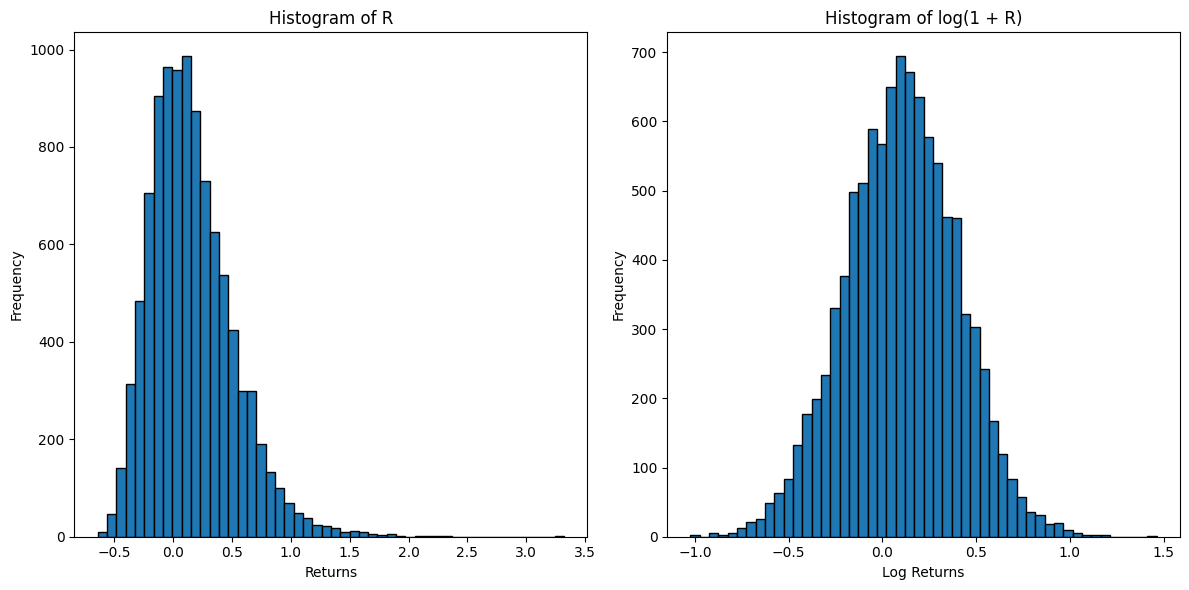

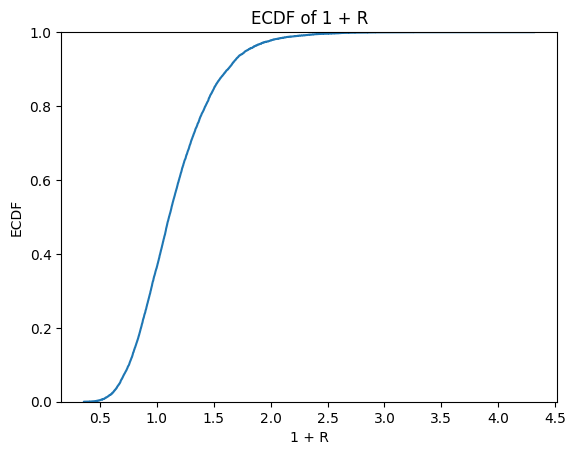

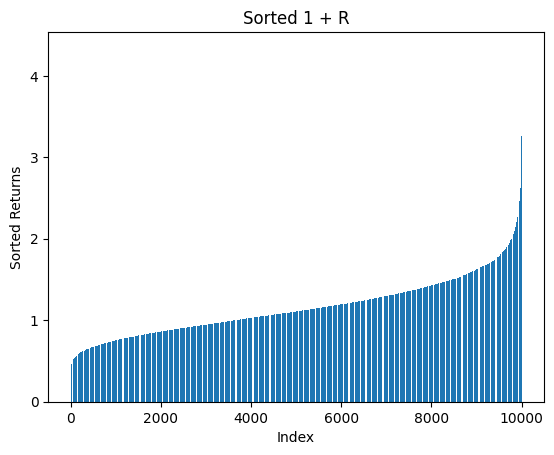

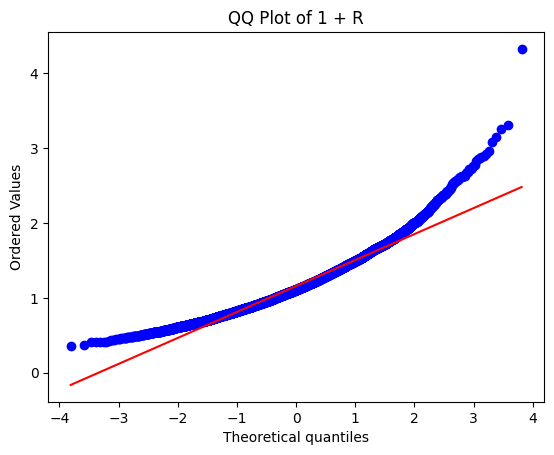

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Assuming P is already defined from the previous code
R = P[-1, :] - 1  # Calculate returns

# Calculate mean and expected return
mean_R = np.mean(R)
expected_return = np.exp(mu + sigma**2 / 2) - 1

# Calculate standard deviation
sd_R = np.std(R)
expected_sd = np.sqrt(np.exp(2 * mu + sigma**2) * (np.exp(sigma**2) - 1))

# Print results
print(f"Mean of R: {mean_R}")
print(f"Expected return: {expected_return}")
print(f"Standard deviation of R: {sd_R}")
print(f"Expected standard deviation: {expected_sd}")

# Histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(R, bins=50, edgecolor='k')
plt.title('Histogram of R')
plt.xlabel('Returns')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(np.log1p(R), bins=50, edgecolor='k')
plt.title('Histogram of log(1 + R)')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# ECDF plot
sns.ecdfplot(1 + R)
plt.title('ECDF of 1 + R')
plt.xlabel('1 + R')
plt.ylabel('ECDF')
plt.show()

# Bar plot of sorted returns
plt.bar(range(len(R)), np.sort(1 + R))
plt.title('Sorted 1 + R')
plt.xlabel('Index')
plt.ylabel('Sorted Returns')
plt.show()

# QQ plot
stats.probplot(1 + R, dist="norm", plot=plt)
plt.title('QQ Plot of 1 + R')
plt.show()


/tmp/ipykernel_40509/2370152603.py:21: RuntimeWarning: invalid value encountered in log
  r = np.log(1 + R)  # Continuous return


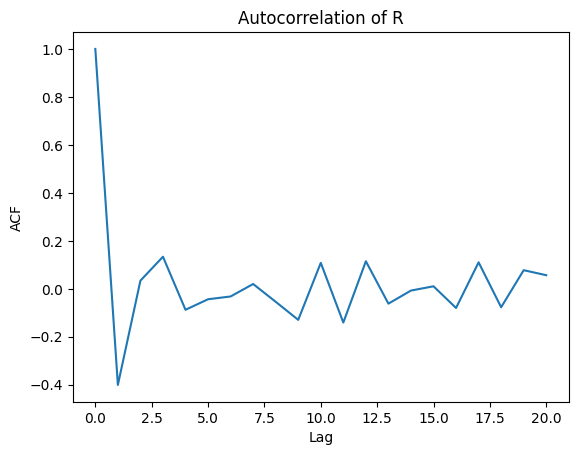

In [13]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Parameters
lambda_ = 0.4
mu = 0.1
Nt = 100  # Number of time steps
Np = 10   # Number of processes
sigma = 1  # Standard deviation of noise
dt = 1    # Time increment

# Initialize matrices
R = np.zeros((Nt, Np))
epsilon = np.random.normal(scale=sigma * np.sqrt(dt), size=(Nt, Np))  # Simulate noise

# Run simulation process forward in time
for t in range(1, Nt):
    R[t, :] = (1 + lambda_) * (mu * dt) - lambda_ * R[t - 1, :] + epsilon[t, :]

r = np.log(1 + R)  # Continuous return

# Calculate and plot autocorrelation function
acf_values = sm.tsa.acf(R[:, 0], fft=True)
plt.plot(acf_values)
plt.title('Autocorrelation of R')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()


# Week 3

In [ ]:
---
title: "Time Series Data and Models"
subtitle: "Model Identification and Estimation"
author: "Paul F. Mende"
date: "Summer 2021"
output: 
  html_notebook:
  df_print: paged
  toc: yes
---

# ## The right model?

# Making inferences from real-world data and building effective models is a challenging process.  The data rarely fits exactly, and models may stop working.  So it always requires judgment, not just stats and number crunching, in applying modeling and forecasting techniques. For that reason, Monte Carlo simulations provide an excellent testing laboratory for identifcation techniques.  We can be sure that a "right answer" exists, then see which analytics identify it and how much uncertainty remains in a best-case scenario.

# - Given a model, estimate its parameters
# - Given a class of models, determine the best

# ## Order determination:  AR(2) Example


In [ ]:
# If you have never installed them, uncomment the lines below and run it one time.

# !pip install numpy pandas matplotlib statsmodels


In [ ]:
# Now we'll load packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import yfinance as yf


In [ ]:
# Simulate AR(2) process
c_0 = 0.001
c_1 = -0.1
c_2 = 0.4
sigma = 1
Nt = 1000
r = np.zeros(Nt)
z = np.random.normal(size=Nt)

for t in range(2, Nt):
    r[t] = c_0 + c_1 * r[t - 1] + c_2 * r[t - 2] + sigma * z[t]

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(r))
plt.title('AR(2) Sample Path')
plt.xlabel('Time')
plt.ylabel('r')
plt.grid(True)
plt.show()


In [ ]:
plot_acf(r, title="AR(2) Sample Autocorrelation Function")
plot_pacf(r, title="AR(2) Sample Partial Autocorrelation Function")
plt.show()

# ## Model estimation: AR(2) example


In [ ]:
# Method (1) Numerical estimation using ordinary least squares
y = r[2:]
x1 = r[1:-1]
x2 = r[:-2]

X = np.column_stack([x1, x2])
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


In [ ]:
# Method (2): Using the arima function
model_ar2 = sm.tsa.ARIMA(r, order=(2, 0, 0)).fit()
print(model_ar2.summary())


In [ ]:
# What if we get the order incorrect?
model_ar5 = sm.tsa.ARIMA(r, order=(5, 0, 0)).fit()
print(model_ar5.summary())

# ## Order determination: MA(2) Example


In [ ]:
# Simulate MA(2) process
mu = 0.0
sigma = 1.0
phi_1 = -0.1
phi_2 = 0.4
r = np.zeros(Nt)
z = np.random.normal(size=Nt)

r[0] = mu + sigma * z[0]
r[1] = mu + sigma * z[1] + phi_1 * z[0]
for t in range(2, Nt):
    r[t] = mu + sigma * z[t] + phi_1 * z[t - 1] + phi_2 * z[t - 2]

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(r))
plt.title('MA(2) Sample Path')
plt.xlabel('Time')
plt.ylabel('r')
plt.grid(True)
plt.show()


In [ ]:
plot_acf(r, title="MA(2) Sample Autocorrelation Function")
plot_pacf(r, title="MA(2) Sample Partial Autocorrelation Function")
plt.show()

# ## Model estimation: MA(2)


In [ ]:
model_ma2 = sm.tsa.ARIMA(r, order=(0, 0, 2)).fit()
print(model_ma2.summary())

# ## Real data is much harder


In [ ]:
# Fetch some test data from Yahoo! Finance
# If you have never installed them, uncomment the lines below and run it one time.

# !pip install yfinance pandas numpy matplotlib

import yfinance as yf

# Define query parameters
ticker = "TR"
date_first = "1987-12-31"
date_last = "2017-12-31"

# Get the data
TR = yf.download(ticker, start=date_first, end=date_last)


In [ ]:
# Here is what the price looks like over time

plt.plot(TR.index, TR['Adj Close'], label='Adjusted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('TR Adjusted Price 1988-2017')
plt.grid(True)
plt.show()


In [ ]:
# Compute the returns
P = TR['Adj Close']
r = np.diff(np.log(P))
N = len(r)

# The returns can also be stored as a new column in TR.
TR['r'] = np.append([np.nan], r)

# Trim off the first row, which has return NA
TR = TR.dropna()

plt.plot(TR.index, TR['r'], label='Daily Returns')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('TR Daily Returns 1988-2017')
plt.grid(True)
plt.show()


In [ ]:
# Is the series stationary?
plt.plot(TR.index, np.random.normal(0, np.std(TR['r']), len(TR)), label='White Noise')
plt.ylim(-0.18, 0.18)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('White Noise Process with TR Volatility')
plt.grid(True)
plt.show()